In [ ]:
!pip install kaggle
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download kaushiksuresh147/customer-segmentation

Dataset URL: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation
License(s): CC0-1.0
  0% 0.00/99.9k [00:00<?, ?B/s]
100% 99.9k/99.9k [00:00<00:00, 81.0MB/s]


In [ ]:
! unzip /content/customer-segmentation.zip

Archive:  /content/customer-segmentation.zip
  inflating: Test.csv                
  inflating: Train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("/content/Train.csv")

In [ ]:
df2 = pd.read_csv("/content/Test.csv")

In [ ]:
df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


#Data Cleaning and pre-processing

In [ ]:
df = pd.concat([df1, df2], axis=0)

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df = df.drop(columns=['ID', 'Segmentation','Var_1'])

In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [ ]:
df.isna().sum()

Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10505 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10593 non-null  object 
 4   Profession       10533 non-null  object 
 5   Work_Experience  9597 non-null   float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10247 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 752.0+ KB


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values ,"\n")

Unique values in 'Gender':
['Male' 'Female'] 

Unique values in 'Ever_Married':
['No' 'Yes' nan] 

Unique values in 'Age':
[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88] 

Unique values in 'Graduated':
['No' 'Yes' nan] 

Unique values in 'Profession':
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan] 

Unique values in 'Work_Experience':
[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.] 

Unique values in 'Spending_Score':
['Low' 'Average' 'High'] 

Unique values in 'Family_Size':
[ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.] 



In [ ]:
replace = {
    'Ever_Married': "Prefer not to disclose",
    'Graduated': "Prefer not to disclose",
    'Profession': 'Others',
    'Work_Experience': 15,
    'Family_Size': 0
}

for column, value in replace.items():
    df[column] = df[column].fillna(value)

In [ ]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,15.0,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,15.0,High,6.0
...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0
2624,Female,No,53,Yes,Entertainment,15.0,Low,2.0
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0


In [ ]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [ ]:
df.describe()

,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,10695.000000
mean,43.511828,3.890790,2.724918
std,16.774158,4.943504,1.608222
min,18.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,7.000000,4.000000
max,89.000000,15.000000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10695 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10695 non-null  object 
 4   Profession       10695 non-null  object 
 5   Work_Experience  10695 non-null  float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10695 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 752.0+ KB


In [ ]:
df2 = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    print(column, "\n", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Gender 
 {'Female': 0, 'Male': 1}
Ever_Married 
 {'No': 0, 'Prefer not to disclose': 1, 'Yes': 2}
Graduated 
 {'No': 0, 'Prefer not to disclose': 1, 'Yes': 2}
Profession 
 {'Artist': 0, 'Doctor': 1, 'Engineer': 2, 'Entertainment': 3, 'Executive': 4, 'Healthcare': 5, 'Homemaker': 6, 'Lawyer': 7, 'Marketing': 8, 'Others': 9}
Spending_Score 
 {'Average': 0, 'High': 1, 'Low': 2}


In [ ]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,5,1.0,2,4.0
1,0,2,38,2,2,15.0,0,3.0
2,0,2,67,2,2,1.0,2,1.0
3,1,2,67,2,7,0.0,1,2.0
4,0,2,40,2,3,15.0,1,6.0
...,...,...,...,...,...,...,...,...
2622,1,0,29,0,5,9.0,2,4.0
2623,0,0,35,2,1,1.0,2,1.0
2624,0,0,53,2,3,15.0,2,2.0
2625,1,2,47,2,4,1.0,1,5.0


In [ ]:
df.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
count,10695.000000,10695.000000,10695.000000,10695.000000,10695.000000,10695.000000,10695.000000,10695.000000
mean,0.546143,1.170266,43.511828,1.238149,2.894624,3.890790,1.364189,2.724918
std,0.497890,0.976388,16.774158,0.966352,2.640059,4.943504,0.847139,1.608222
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,1.000000,2.000000,41.000000,2.000000,3.000000,1.000000,2.000000,2.000000
75%,1.000000,2.000000,53.000000,2.000000,5.000000,7.000000,2.000000,4.000000
max,1.000000,2.000000,89.000000,2.000000,9.000000,15.000000,2.000000,9.000000


### Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = MinMaxScaler()
# df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df_norm

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0.911604,-1.198623,-1.282499,-1.281321,0.797510,-0.584793,0.750575,0.792889
1,-1.096967,0.849839,-0.328606,0.788416,-0.338881,2.247339,-1.610424,0.171055
2,-1.096967,0.849839,1.400325,0.788416,-0.338881,-0.584793,0.750575,-1.072613
3,0.911604,0.849839,1.400325,0.788416,1.555105,-0.787088,-0.429925,-0.450779
4,-1.096967,0.849839,-0.209369,0.788416,0.039916,2.247339,-0.429925,2.036557
...,...,...,...,...,...,...,...,...
10690,0.911604,-1.198623,-0.865170,-1.281321,0.797510,1.033568,0.750575,0.792889
10691,-1.096967,-1.198623,-0.507461,0.788416,-0.717678,-0.584793,0.750575,-1.072613
10692,-1.096967,-1.198623,0.565669,0.788416,0.039916,2.247339,0.750575,-0.450779
10693,0.911604,0.849839,0.207959,0.788416,0.418713,-0.584793,-0.429925,1.414723


#Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_norm)

In [ ]:
df_pca = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2','PCA3'])
df_pca

,PCA1,PCA2,PCA3
0,-2.282460,1.294811,0.117333
1,1.166247,-0.356099,-1.156340
2,1.266081,-1.594390,0.844903
3,1.486732,0.448984,1.846103
4,0.312923,0.515551,-1.281485
...,...,...,...
10690,-2.220679,1.026314,0.244548
10691,-0.764320,-2.025582,-0.530757
10692,-0.742385,-1.930773,0.136786
10693,0.893184,1.369378,-0.249783


In [ ]:
pca.explained_variance_ratio_

array([0.27303221, 0.16294865, 0.14506692])

In [ ]:
# 3D plotting
import plotly.express as px

fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3', color_discrete_sequence=['blue'])

# Adjust the size of the data points
fig.update_traces(marker=dict(size=2))

fig.update_layout(title="3D Projection Of Data In The Reduced Dimension", height=600, width=800)
fig.show()

# Determining the number of clusters using the Elbow method

In [ ]:
from sklearn.cluster import KMeans

inertias = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

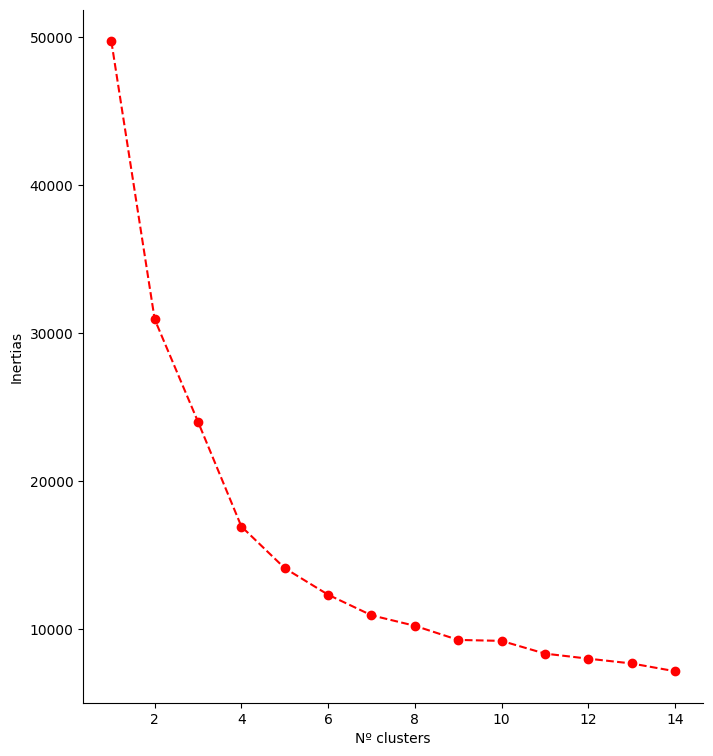

In [ ]:
fig, ax = plt.subplots(figsize=(8, 9))

ax.plot(range(1, 15), inertias, 'r--', marker='o', label='Inertias')

ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Nº clusters', fontsize=10)
ax.set_ylabel('Inertias', fontsize=10)

plt.show()

In [ ]:
n_clusters = 4

#K-means clustering

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
try:
  kmeans.fit(df_pca.drop(Clusters,axis=1))
except:
  kmeans.fit(df_pca)

In [ ]:
df_pca

,PCA1,PCA2,PCA3
0,-2.282460,1.294811,0.117333
1,1.166247,-0.356099,-1.156340
2,1.266081,-1.594390,0.844903
3,1.486732,0.448984,1.846103
4,0.312923,0.515551,-1.281485
...,...,...,...
10690,-2.220679,1.026314,0.244548
10691,-0.764320,-2.025582,-0.530757
10692,-0.742385,-1.930773,0.136786
10693,0.893184,1.369378,-0.249783


In [ ]:
labels = kmeans.labels_

In [ ]:
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

labels_mapping = [mapping[val] for val in labels]

In [ ]:
df_pca['Clusters'] = labels_mapping

In [ ]:
# Plotting the clusters
colors = [
    "#F0810F",  # Orange
    "#063852",  # Blueberry
    "#E6DF44",  # Lemon
    "#800080"   # Purple
]

fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3',
              color='Clusters',color_discrete_sequence=colors, opacity=0.6, symbol = 'Clusters')

# Adjust the size of the data points
fig.update_traces(marker=dict(size=2))

fig.update_layout(title="Plot of Clusters", height=600, width=800)
fig.show()

## ANALYSIS OF CLUSTERS

### distribution of clusters

In [ ]:
fig = px.histogram(df_pca, x='Clusters', color='Clusters', color_discrete_sequence=colors)
fig.show()

# PROFILING CUSTOMERS

In [ ]:
df2['Clusters'] = df_pca['Clusters']

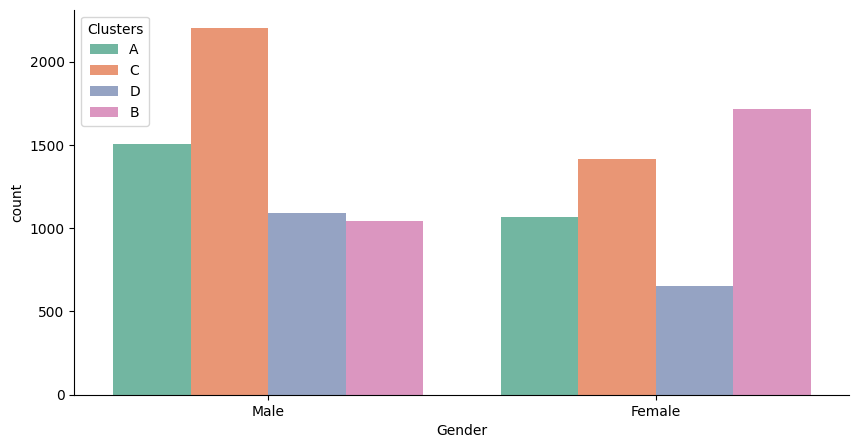

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(df2, x='Gender', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

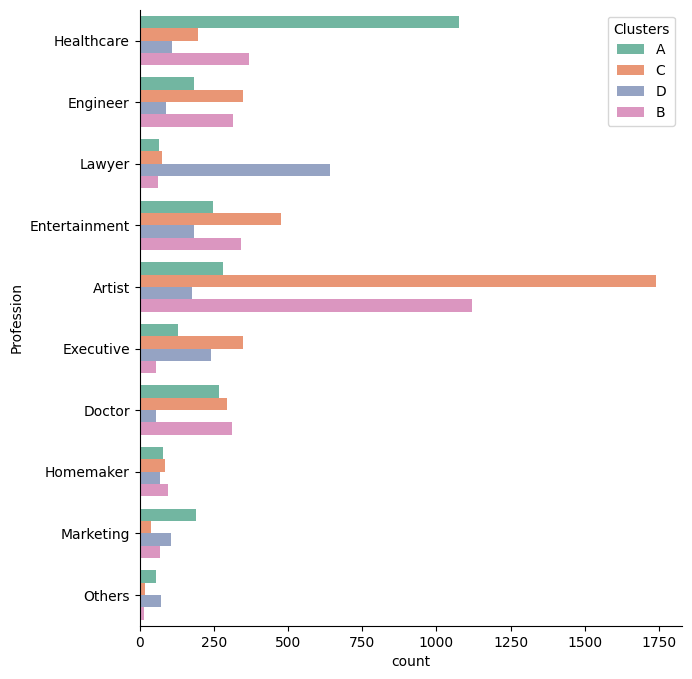

In [ ]:
fig, ax = plt.subplots(figsize=(7, 8))

sns.countplot(df2, y='Profession', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

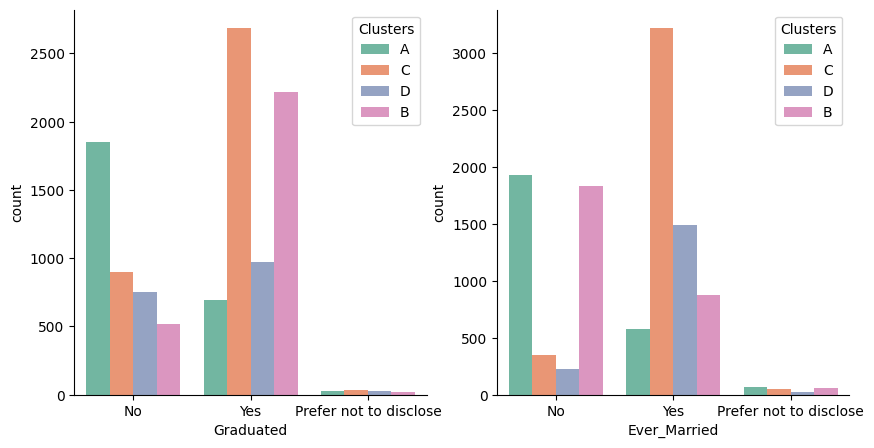

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

sns.countplot(df2, x='Graduated', hue='Clusters', palette='Set2', ax=ax[0])
sns.countplot(df2, x='Ever_Married', hue='Clusters', palette='Set2', ax=ax[1])

ax[0].spines[['top', 'right']].set_visible(False)
ax[1].spines[['top', 'right']].set_visible(False)

plt.show()

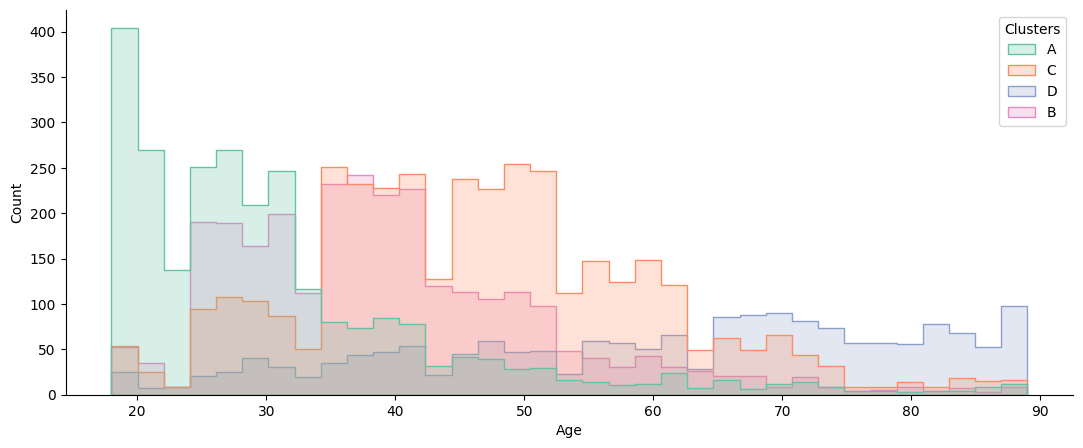

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.histplot(df2, x="Age", hue="Clusters", element="step", palette='Set2')


ax.spines[['top', 'right']].set_visible(False)

plt.show()

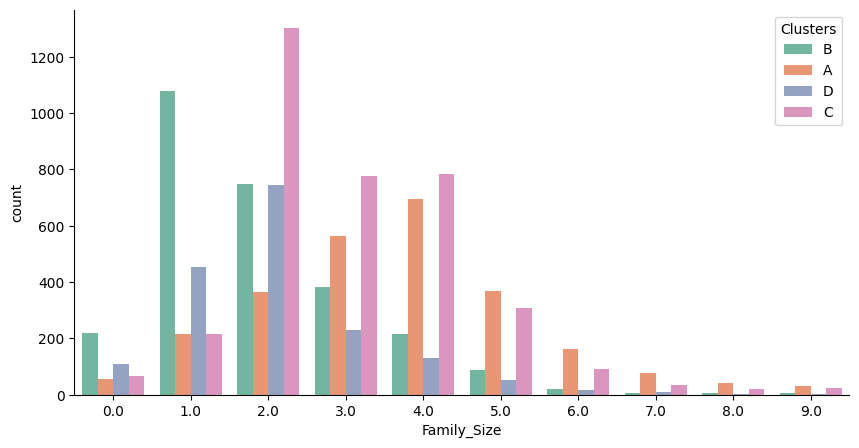

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(df2, x='Family_Size', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

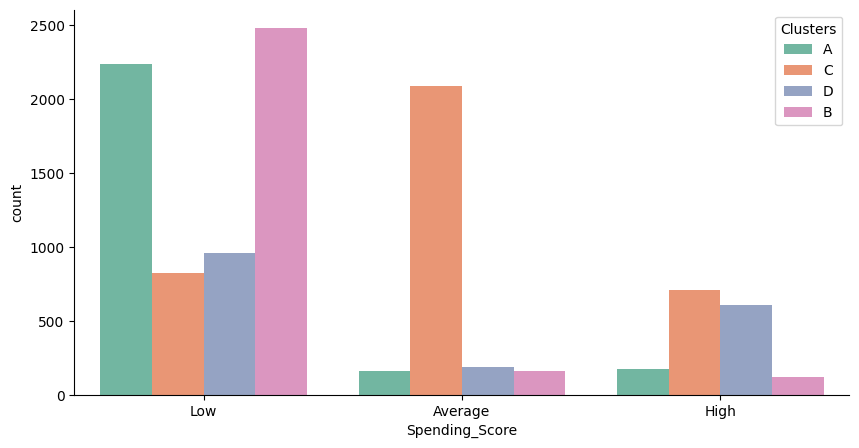

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(df2, x='Spending_Score', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

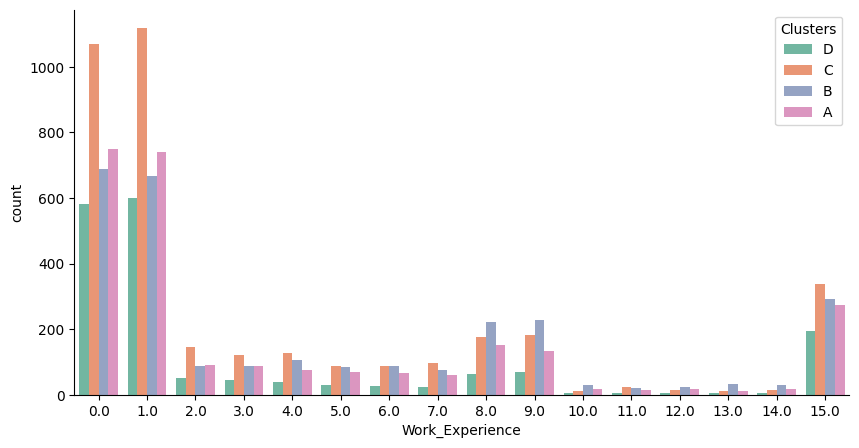

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(df2, x='Work_Experience', hue='Clusters', palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

In [ ]:
df_norm["Clusters"] = df_pca["Clusters"]

<Figure size 640x480 with 0 Axes>

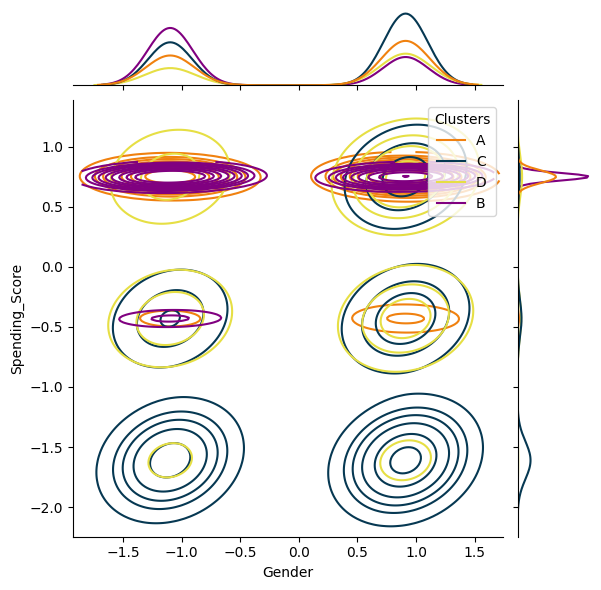

<Figure size 640x480 with 0 Axes>

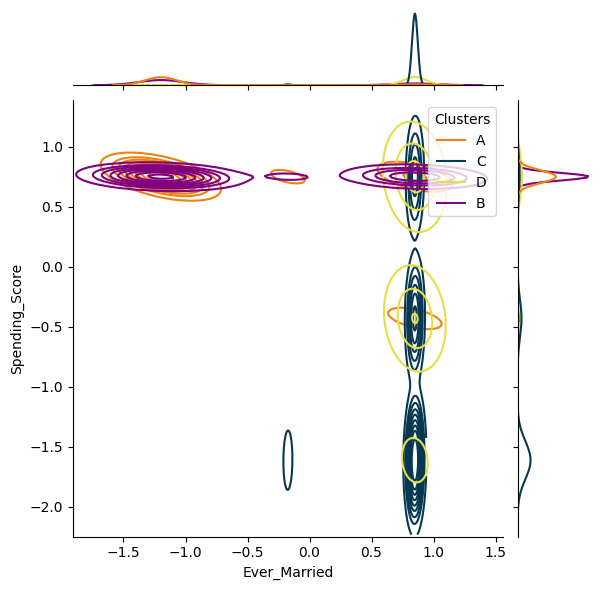

<Figure size 640x480 with 0 Axes>

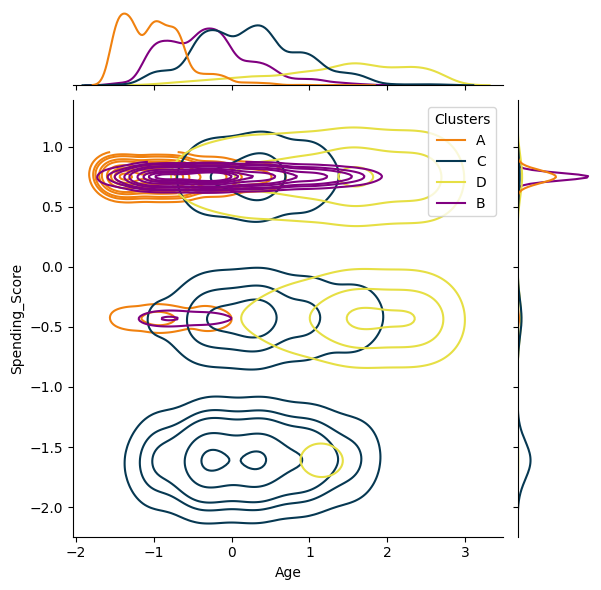

<Figure size 640x480 with 0 Axes>

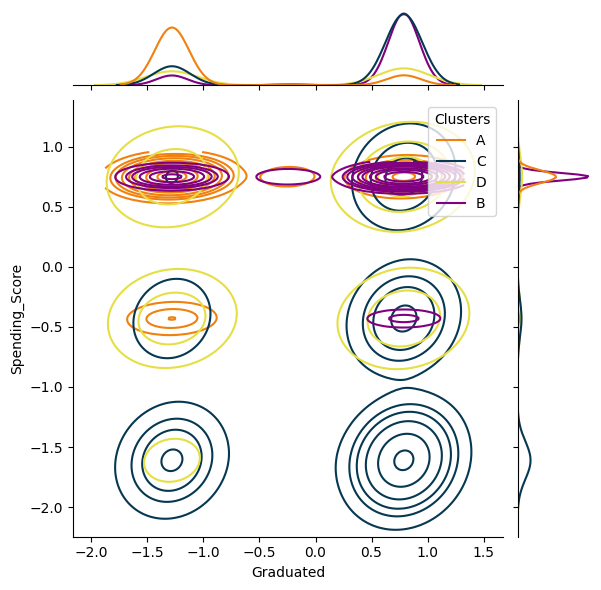

<Figure size 640x480 with 0 Axes>

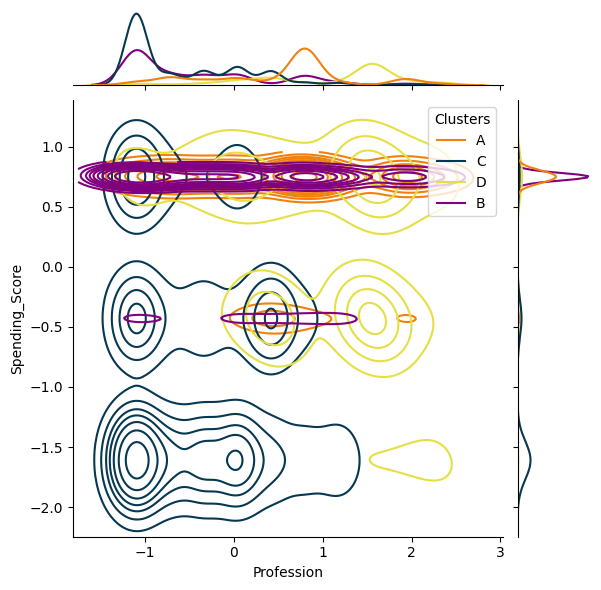

<Figure size 640x480 with 0 Axes>

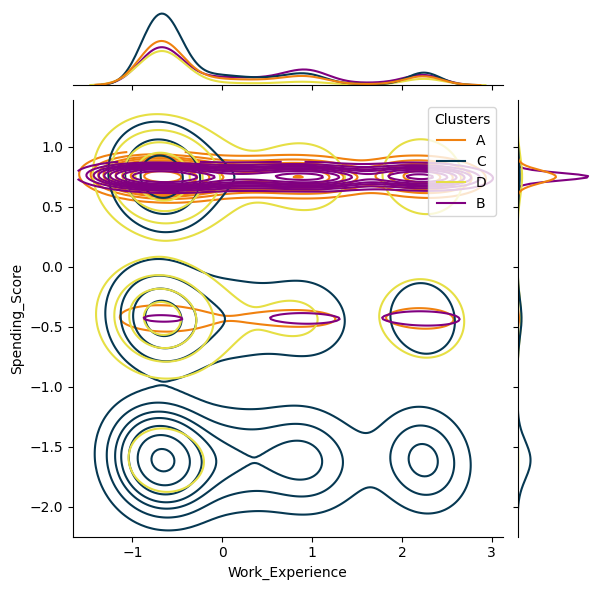

<Figure size 640x480 with 0 Axes>

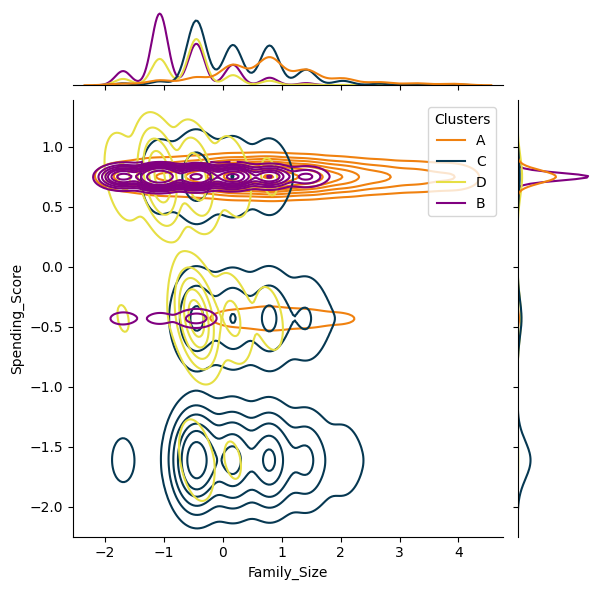

In [ ]:
category = ["Gender","Ever_Married","Age","Graduated","Profession","Work_Experience","Family_Size"]

for i in category:
    plt.figure()
    sns.jointplot(x=df_norm[i], y=df_norm["Spending_Score"], hue =df_norm["Clusters"], kind="kde", palette=colors)
    plt.show()

#CUSTOMER PROFILES:

## cluster A

-Composed of individuals with low Spending Score

-Composed of individual which have never been married

-Most of the customers are Young

-Composed of individuals mostly who are not graduated

-Predominantly composed of Individuals working in Healthcare sector


## cluster B

-Composed of individuals with low Spending Score

-Composed of individuals mostly who are graduated

-Majority of individuals have family size b/w 1-3

-Most of the customers are Young

-Predominantly composed of artists.

## cluster C

-Composed of individuals with Average Spending Score

-Composed of individuals who were/are married

-Composed of individuals mostly who are graduated

-Predominantly composed of artists.

-Middle-aged/old customers

-Majority of individuals have family size b/w 2-4

## cluster D

-Composed of individuals who were/are married

-Predominantly composed of Lawyers.

-old customers

# Prediction model to predict Cluster

In [ ]:
df_norm

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Clusters
0,0.911604,-1.198623,-1.282499,-1.281321,0.797510,-0.584793,0.750575,0.792889,A
1,-1.096967,0.849839,-0.328606,0.788416,-0.338881,2.247339,-1.610424,0.171055,C
2,-1.096967,0.849839,1.400325,0.788416,-0.338881,-0.584793,0.750575,-1.072613,D
3,0.911604,0.849839,1.400325,0.788416,1.555105,-0.787088,-0.429925,-0.450779,D
4,-1.096967,0.849839,-0.209369,0.788416,0.039916,2.247339,-0.429925,2.036557,C
...,...,...,...,...,...,...,...,...,...
10690,0.911604,-1.198623,-0.865170,-1.281321,0.797510,1.033568,0.750575,0.792889,A
10691,-1.096967,-1.198623,-0.507461,0.788416,-0.717678,-0.584793,0.750575,-1.072613,B
10692,-1.096967,-1.198623,0.565669,0.788416,0.039916,2.247339,0.750575,-0.450779,B
10693,0.911604,0.849839,0.207959,0.788416,0.418713,-0.584793,-0.429925,1.414723,C


In [ ]:
label_encoder2 = LabelEncoder()

df_norm["Clusters"] = label_encoder2.fit_transform(df_norm['Clusters'])
print(column, "\n", dict(zip(label_encoder2.classes_, label_encoder2.transform(label_encoder2.classes_))))


Spending_Score 
 {'A': 0, 'B': 1, 'C': 2, 'D': 3}


In [ ]:
df_norm.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Clusters
0,0.911604,-1.198623,-1.282499,-1.281321,0.797510,-0.584793,0.750575,0.792889,0
1,-1.096967,0.849839,-0.328606,0.788416,-0.338881,2.247339,-1.610424,0.171055,2
2,-1.096967,0.849839,1.400325,0.788416,-0.338881,-0.584793,0.750575,-1.072613,3
3,0.911604,0.849839,1.400325,0.788416,1.555105,-0.787088,-0.429925,-0.450779,3
4,-1.096967,0.849839,-0.209369,0.788416,0.039916,2.247339,-0.429925,2.036557,2


In [ ]:
from sklearn.model_selection import train_test_split

X = df_norm.drop('Clusters', axis=1)
y = df_norm['Clusters']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred1 = clf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
class_report = classification_report(y_test, y_pred1)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9770920991117344
Confusion Matrix:
[[487   7   4   5]
 [  6 564   3   0]
 [  0   5 706   4]
 [  1   5   9 333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       503
           1       0.97      0.98      0.98       573
           2       0.98      0.99      0.98       715
           3       0.97      0.96      0.97       348

    accuracy                           0.98      2139
   macro avg       0.98      0.97      0.98      2139
weighted avg       0.98      0.98      0.98      2139



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

clf2 = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],    # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
best_clf = grid_search.best_estimator_  # or random_search.best_estimator_
y_pred2 = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9789621318373072
Confusion Matrix:
[[487   6   5   5]
 [  5 564   3   1]
 [  0   4 707   4]
 [  0   4   8 336]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       503
           1       0.98      0.98      0.98       573
           2       0.98      0.99      0.98       715
           3       0.97      0.97      0.97       348

    accuracy                           0.98      2139
   macro avg       0.98      0.98      0.98      2139
weighted avg       0.98      0.98      0.98      2139



In [ ]:
import xgboost as xgb

clf3 = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)

# Train the model
clf3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [ ]:
y_pred3 = clf3.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)
class_report = classification_report(y_test, y_pred3)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9794296400187004
Confusion Matrix:
[[490   4   4   5]
 [  6 564   3   0]
 [  2   4 703   6]
 [  2   3   5 338]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       503
           1       0.98      0.98      0.98       573
           2       0.98      0.98      0.98       715
           3       0.97      0.97      0.97       348

    accuracy                           0.98      2139
   macro avg       0.98      0.98      0.98      2139
weighted avg       0.98      0.98      0.98      2139



In [ ]:
import xgboost as xgb

clf3.save_model('model.xgb')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:01:19] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



In [ ]:
import pickle

filename = 'label_encoder.pkl'
with open(filename, 'wb') as file:
    pickle.dump(label_encoder, file)